<br>**Tasks** <br>
>**Coding [2 Marks]**

<br>Load the required libraries.<br>


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br>Loading the data and preparing the data.<br><br>
     The data comes in two csv files, handily split into
     train and test <br>('fashion-mnist_train.csv' + 'fashion-mnist_test.csv').<br><br>
     so, you might call:

```
         train = pd.read_csv('../input/fashion-mnist_train.csv', dtype=int)
         X_train = train.drop('label', axis=1)
         y_train = train['label']
         test = pd.read_csv('../input/fashion-mnist_test.csv', dtype=int)
         X_test = test.drop('label', axis=1)
         y_test = test['label']
```

> Note:
>> Using 'dtype=int' is a good idea to save memory and speed up runtime

In [ ]:
# Download the datasets
!wget https://cms.waikato.ac.nz/~nlim/data/fashion-mnist_test.csv
!wget https://cms.waikato.ac.nz/~nlim/data/fashion-mnist_train.csv

# Load the data
train = pd.read_csv('fashion-mnist_train.csv', dtype=int)
X_train = train.drop('label', axis=1)
y_train = train['label']
test = pd.read_csv('fashion-mnist_test.csv', dtype=int)
X_test = test.drop('label', axis=1)
y_test = test['label']

--2023-09-18 08:00:11--  https://cms.waikato.ac.nz/~nlim/data/fashion-mnist_test.csv
Resolving cms.waikato.ac.nz (cms.waikato.ac.nz)... 130.217.226.35
Connecting to cms.waikato.ac.nz (cms.waikato.ac.nz)|130.217.226.35|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cms.waikato.ac.nz/~nlim/data/fashion-mnist_test.csv [following]
--2023-09-18 08:00:12--  https://www.cms.waikato.ac.nz/~nlim/data/fashion-mnist_test.csv
Resolving www.cms.waikato.ac.nz (www.cms.waikato.ac.nz)... 130.217.226.35
Connecting to www.cms.waikato.ac.nz (www.cms.waikato.ac.nz)|130.217.226.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22176691 (21M) [text/csv]
Saving to: ‘fashion-mnist_test.csv’

fashion-mnist_test. 100%[===================>]  21.15M  8.64MB/s    in 2.4s    

2023-09-18 08:00:16 (8.64 MB/s) - ‘fashion-mnist_test.csv’ saved [22176691/22176691]

--2023-09-18 08:00:17--  https://cms.waikato.ac.nz/~nlim/data/fashion-mni

- Plot the first 3 images from X_train.<br>
You can retrieve the raw gray scale values of the first image and turn them into a 28 by 28 numpy-area like so:
```

     def plot_matrix(m,target_names=None,cm=plt.cm.viridis):
         fig = plt.figure(figsize=m.shape)
         ax = fig.add_subplot(111)
         cax = ax.matshow(m,cmap=cm)
         if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)
         fig.colorbar(cax)
         plt.show()
```
  > Hint:
  >> you can use np.reshape(array, (28,28)) to reshape an array to 28x28,
  
  > Note:
  >> The array must have exactly 784 elements or this code will fail.


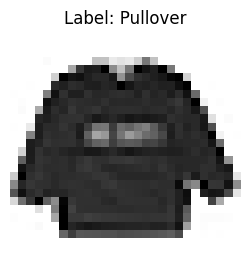

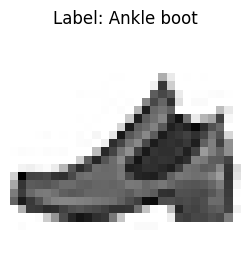

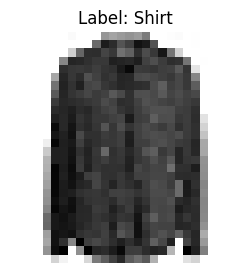

In [ ]:
def plot_matrix(m, target_names=None, cm=plt.cm.viridis):
    fig = plt.figure(figsize=(8, 8))  # Adjust the figure size
    ax = fig.add_subplot(111)
    cax = ax.matshow(m, cmap=cm)
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    fig.colorbar(cax)
    plt.show()

# Define human-readable labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 3 images from X_train
for i in range(3):
    plt.figure(figsize=(3, 3))  # Adjust the figure size
    plt.imshow(np.reshape(X_train.values[i], (28, 28)), cmap=plt.cm.binary)
    plt.title(f"Label: {labels[y_train[i]]}")
    plt.axis('off')  # Hide axis
    plt.show()





<br><br>**Tasks**<br>
> **a) [1 mark]**<br>

 - Define a function for finding a good combination of hyper-parameter values
  that will work for the RandomForestClassifier and the ExtraTreesClassifier. Try all possible pairs for max_features in [4,12,'sqrt'] and max_depth in [4,12,None].<br>
  Select the combination that gives you the highest out-of-bag score for accuracy.<br>
  You also want to be able to specify the ensemble size, with a default of 30. <br><br>
  A good structure would be something that looks like this:
```
  def grid_search(CLF, X_train, y_train, n_estimators=30):
     # for all combinations of max_depth + max_features:
        # initialise the classifier, setting the oob_score and the bootstrap flag
        #    also set random_state to our ID
        #    and set max_depth, max_features, and n_estimators
        #    and n_jobs=-1  for some multi-core processing
        # train the classifier using the train data
        # retrieve the oob score
        # print and store max_depth, max_features, and oob score
     # return the highest oob score and the respective max_depth and max_features values
```

 <br><br><br><br><br><br><br>

In [ ]:



# random state should be set to my ID
MY_ID = 1481257

# Define a function for grid search
def grid_search(CLF, X_train, y_train, n_estimators=30):
    best_oob_score = -1
    best_max_depth = None
    best_max_features = None
    best_classifier = None

    for max_depth in [4, 8, 12, 16, None]:
        for max_features in [4, 8, 12, 16, None]:
            # Initialize the classifier
            if CLF == 'RandomForest':
                clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                            max_features=max_features, oob_score=True, bootstrap=True,
                                            random_state=MY_ID, n_jobs=-1)
            elif CLF == 'ExtraTrees':
                clf = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                           max_features=max_features, oob_score=True, bootstrap=True,
                                           random_state=MY_ID, n_jobs=-1)

            # Train the classifier
            clf.fit(X_train, y_train)

            # Retrieve the OOB score
            oob_score = clf.oob_score_

            # Print max_depth, max_features, and OOB score
            print(f"Max Depth: {max_depth}, Max Features: {max_features}, OOB Score: {oob_score}")

            # Update the best parameters if necessary
            if oob_score > best_oob_score:
                best_oob_score = oob_score
                best_max_depth = max_depth
                best_max_features = max_features
                best_classifier = clf

    return best_oob_score, best_max_depth, best_max_features, best_classifier

- Run grid_search for both RandomForestClassifier, ExtraTreesClassifier (n_estimators=30) and ExtraTreesClassifier (n_estimators=90).<br><br>

  Print the results from the grid_search.
  > Note:
  >> There should be 25 combinations for each classifiers and this function should take about 15 minutes to complete all three classifiers.

In [ ]:
# Grid search for RandomForestClassifier with 30 estimators
print("RandomForestClassifier Results")
rf_best_oob_score, rf_best_max_depth, rf_best_max_features, rf_best_classifier = grid_search('RandomForest', X_train, y_train)

# Print the best parameters for RandomForestClassifier
print(f"\nBest RandomForest Parameters: Max Depth = {rf_best_max_depth}, Max Features = {rf_best_max_features}, OOB Score = {rf_best_oob_score}")

# Grid search for ExtraTreesClassifier with 30 estimators
print("\nExtraTreesClassifier with 30 estimators Results")
et30_best_oob_score, et30_best_max_depth, et30_best_max_features, et30_best_classifier = grid_search('ExtraTrees', X_train, y_train, n_estimators=30)

# Print the best parameters for ExtraTreesClassifier with 30 estimators
print(f"\nBest ExtraTrees (30 estimators) Parameters: Max Depth = {et30_best_max_depth}, Max Features = {et30_best_max_features}, OOB Score = {et30_best_oob_score}")

# Grid search for ExtraTreesClassifier with 90 estimators
print("\nExtraTreesClassifier with 90 estimators Results")
et90_best_oob_score, et90_best_max_depth, et90_best_max_features, et90_best_classifier = grid_search('ExtraTrees', X_train, y_train, n_estimators=90)

# Print the best parameters for ExtraTreesClassifier with 90 estimators
print(f"\nBest ExtraTrees (90 estimators) Parameters: Max Depth = {et90_best_max_depth}, Max Features = {et90_best_max_features}, OOB Score = {et90_best_oob_score}")









RandomForestClassifier Results
Max Depth: 4, Max Features: 4, OOB Score: 0.7121833333333333
Max Depth: 4, Max Features: 8, OOB Score: 0.7307666666666667
Max Depth: 4, Max Features: 12, OOB Score: 0.7239166666666667
Max Depth: 4, Max Features: 16, OOB Score: 0.7276166666666667
Max Depth: 4, Max Features: None, OOB Score: 0.66345
Max Depth: 8, Max Features: 4, OOB Score: 0.797
Max Depth: 8, Max Features: 8, OOB Score: 0.80735
Max Depth: 8, Max Features: 12, OOB Score: 0.8137833333333333
Max Depth: 8, Max Features: 16, OOB Score: 0.8178833333333333
Max Depth: 8, Max Features: None, OOB Score: 0.8147666666666666
Max Depth: 12, Max Features: 4, OOB Score: 0.82665
Max Depth: 12, Max Features: 8, OOB Score: 0.8418
Max Depth: 12, Max Features: 12, OOB Score: 0.8470666666666666
Max Depth: 12, Max Features: 16, OOB Score: 0.85125
Max Depth: 12, Max Features: None, OOB Score: 0.8536
Max Depth: 16, Max Features: 4, OOB Score: 0.84105
Max Depth: 16, Max Features: 8, OOB Score: 0.8526666666666667
Ma

- Train a RandomForestClassifier with the best hyper-parameter settings as returned from grid_search.
  - Compute and print accuracy for the test set.
  - Compute and print the confusion matrix for the test set.
  - Plot the confusion matrix.
  - Retrieve the feature_importances from your model, turn them into a 28 by 28 numpy array and plot this matrix as well.

In [ ]:
# Train RandomForestClassifier with the best hyper-parameter settings as returned from grid_search
best_rf_classifier = rf_best_classifier
best_rf_classifier.fit(X_train, y_train)

# Compute the accuracy for the test set
rf_pred = best_rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the accuracy
print(f"RandomForestClassifier Test Accuracy: {rf_accuracy:.4f}")


RandomForestClassifier Test Accuracy: 0.8746


In [ ]:

# Compute the confusion matrix for the test set
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)

# Print confusion matrix
print("Confusion Matrix for RandomForestClassifier:")
print(rf_confusion_matrix)


Confusion Matrix for RandomForestClassifier:
[[855   0  13  34   1   1  82   0  14   0]
 [  2 964   9  17   2   1   5   0   0   0]
 [ 12   1 786  13 123   0  59   0   6   0]
 [ 21   8  11 923  25   0  12   0   0   0]
 [  0   1  72  30 852   0  41   0   4   0]
 [  0   0   0   0   0 927   1  52   3  17]
 [183   1 104  29  84   0 582   0  17   0]
 [  0   0   0   0   0  17   0 926   0  57]
 [  3   1   7   0   4   1   5   3 975   1]
 [  0   0   0   0   0   6   1  35   2 956]]


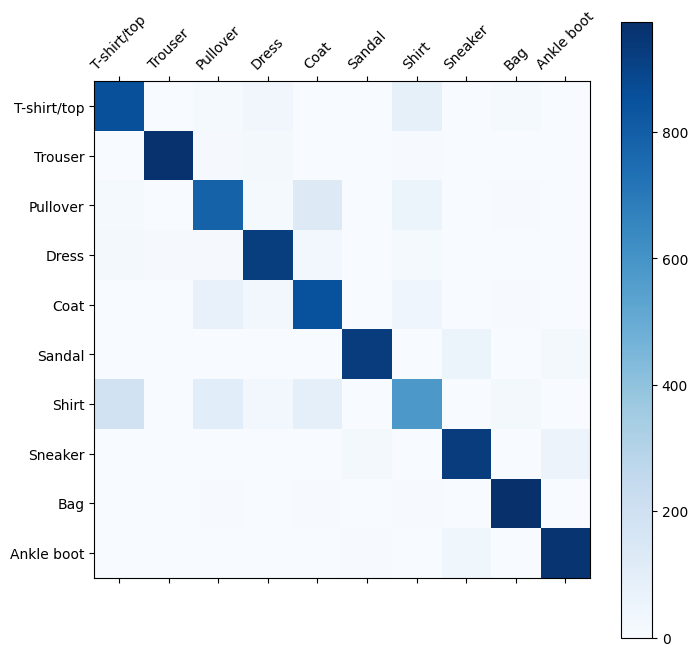

In [ ]:
# Plot the confusion matrix
plot_matrix(rf_confusion_matrix, target_names=labels, cm=plt.cm.Blues)

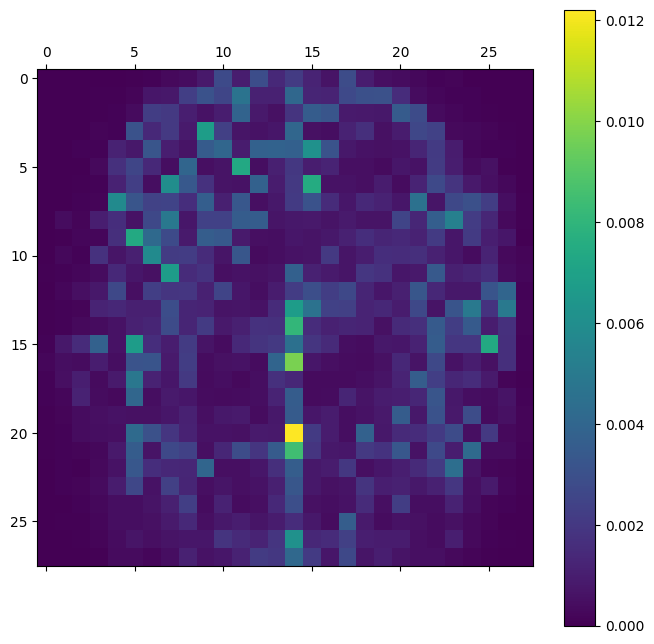

In [ ]:
# Retrieve feature importances from the best RandomForestClassifier
rf_feature_importances = best_rf_classifier.feature_importances_

# Turn them into a 28 by 28 numpy array
rf_feature_importance_matrix = np.reshape(rf_feature_importances, (28, 28))

# Plot feature importance matrix for the best RandomForestClassifier
plot_matrix(rf_feature_importance_matrix, cm=plt.cm.viridis)




















<br>
Do the above steps for both variants of ExtraTreesClassifier.<br>

In [ ]:
# Train ExtraTreesClassifier with the best hyper-parameter settings as returned from grid_search (30 estimators)
best_et30_classifier = et30_best_classifier
best_et30_classifier.fit(X_train, y_train)

# Evaluate ExtraTreesClassifier (30 estimators) on the test set
et30_pred = best_et30_classifier.predict(X_test)
et30_accuracy = accuracy_score(y_test, et30_pred)

# Print accuracy for the test set
print(f"ExtraTreesClassifier (30 Estimators) Test Accuracy: {et30_accuracy:.4f}")


ExtraTreesClassifier (30 Estimators) Test Accuracy: 0.8814


In [ ]:

# Compute confusion matrix for ExtraTreesClassifier (30 estimators)
et30_confusion_matrix = confusion_matrix(y_test, et30_pred)

# Print confusion matrix
print("Confusion Matrix for ExtraTreesClassifier (30 Estimators):")
print(et30_confusion_matrix)


Confusion Matrix for ExtraTreesClassifier (30 Estimators):
[[865   1  12  26   0   1  86   0   9   0]
 [  5 973   3  14   0   1   4   0   0   0]
 [  6   2 806  10 107   0  60   0   9   0]
 [ 27   8  11 911  25   0  17   0   1   0]
 [  3   0  79  33 840   0  43   0   2   0]
 [  0   0   0   0   0 945   0  36   6  13]
 [167   3  99  27  75   0 617   0  12   0]
 [  0   0   0   0   0  23   0 931   1  45]
 [  2   1   6   0   3   2   9   2 974   1]
 [  0   0   0   0   0   7   0  40   1 952]]


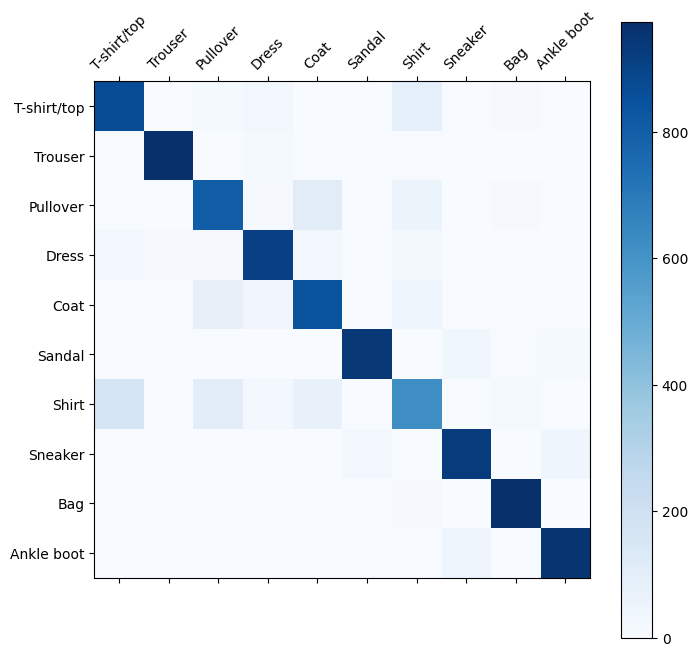

In [ ]:










# Plot confusion matrix
plot_matrix(et30_confusion_matrix, target_names=labels, cm=plt.cm.Blues)


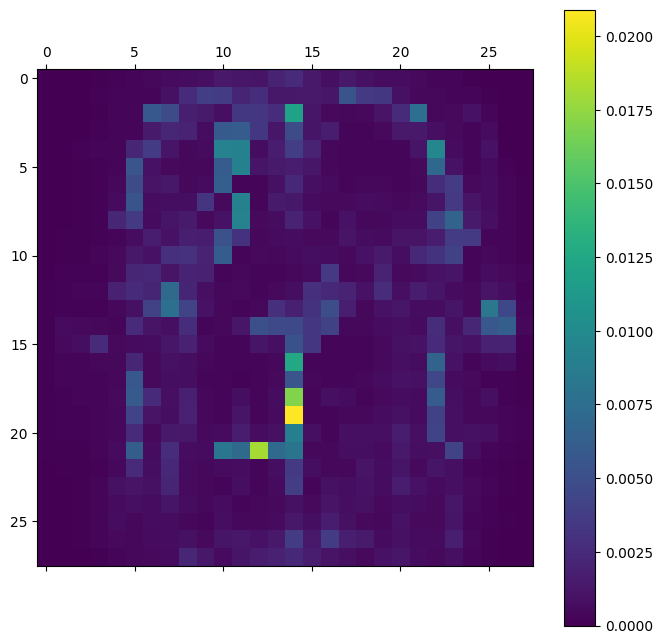

In [ ]:








































# Retrieve feature importances from the best ExtraTreesClassifier (30 estimators)
et30_feature_importances = best_et30_classifier.feature_importances_

# Reshape feature importances as a 28x28 matrix
et30_feature_importance_matrix = np.reshape(et30_feature_importances, (28, 28))

# Plot feature importance matrix for the best ExtraTreesClassifier (30 estimators)
plot_matrix(et30_feature_importance_matrix, cm=plt.cm.viridis)


In [ ]:

# Train ExtraTreesClassifier with the best hyper-parameter settings as returned from grid_search (90 estimators)
best_et90_classifier = et90_best_classifier
best_et90_classifier.fit(X_train, y_train)

# Evaluate ExtraTreesClassifier (90 estimators) on the test set
et90_pred = best_et90_classifier.predict(X_test)
et90_accuracy = accuracy_score(y_test, et90_pred)

# Print accuracy for the test set
print(f"ExtraTreesClassifier (90 Estimators) Test Accuracy: {et90_accuracy:.4f}")


ExtraTreesClassifier (90 Estimators) Test Accuracy: 0.8880


In [ ]:

# Compute confusion matrix for ExtraTreesClassifier (90 estimators)
et90_confusion_matrix = confusion_matrix(y_test, et90_pred)

# Print confusion matrix
print("Confusion Matrix for ExtraTreesClassifier (90 Estimators):")
print(et90_confusion_matrix)


Confusion Matrix for ExtraTreesClassifier (90 Estimators):
[[864   0  13  31   1   1  82   0   8   0]
 [  3 973   4  15   0   1   4   0   0   0]
 [  8   1 807  12 107   0  56   0   9   0]
 [ 21   7   9 918  24   0  20   0   1   0]
 [  2   0  68  26 855   0  47   0   2   0]
 [  0   0   0   0   0 947   0  39   3  11]
 [158   2  94  24  64   0 643   0  15   0]
 [  0   0   0   0   0  16   0 940   1  43]
 [  1   1   8   0   4   2   6   2 976   0]
 [  0   0   1   0   0   7   0  34   1 957]]


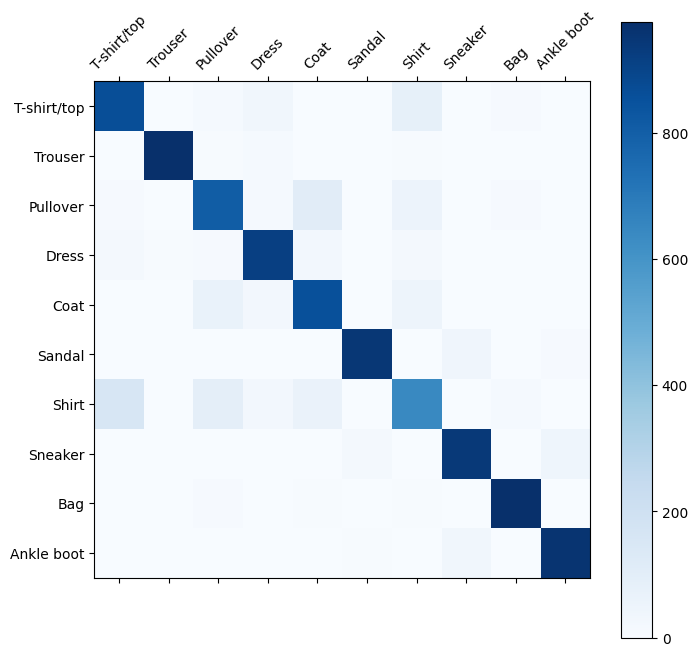

In [ ]:

# Plot confusion matrix
plot_matrix(et90_confusion_matrix, target_names=labels, cm=plt.cm.Blues)


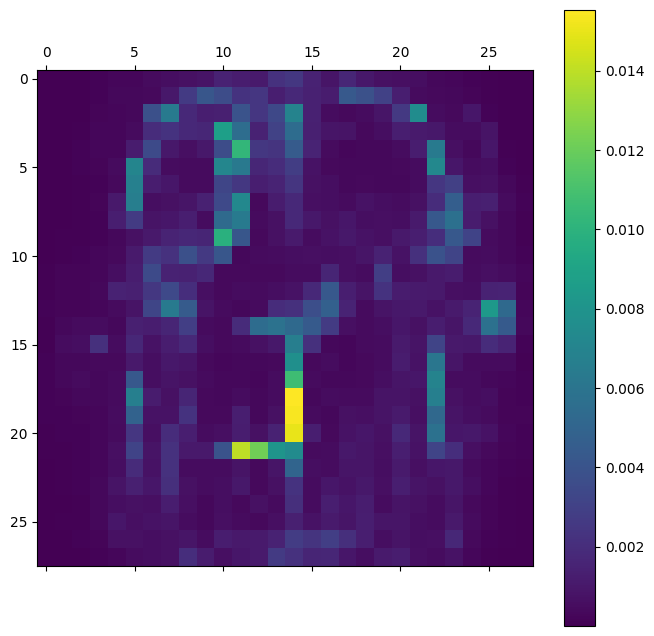

In [ ]:











































# Retrieve feature importances from the best ExtraTreesClassifier (90 estimators)
et90_feature_importances = best_et90_classifier.feature_importances_

# Reshape feature importances as a 28x28 matrix
et90_feature_importance_matrix = np.reshape(et90_feature_importances, (28, 28))

# Plot feature importance matrix for the best ExtraTreesClassifier (90 estimators)
plot_matrix(et90_feature_importance_matrix, cm=plt.cm.viridis)


<br>**Tasks** <br>
> **b) [1 mark]** <br>

- Train an AdaBoostClassifier with 300 estimators and plot the training and test loss for the boosted ensemble for the different number of estimator.

> Note:
>> you only need to train once and the entire process should take between 15-30 minutes.
  
  >>you do not need to do grid search to choose the max_depth, max_features for the base estimators of the AdaBoostClassifier - use the default estimator.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


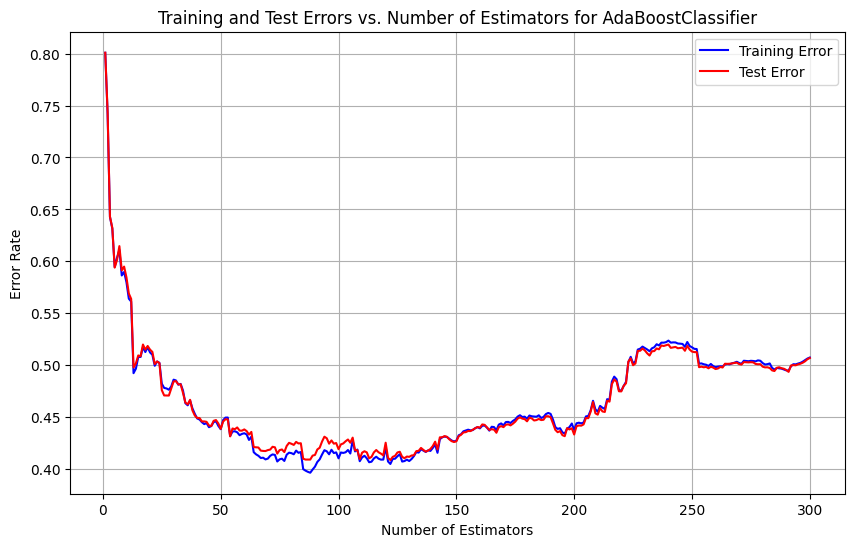

In [ ]:

# Train AdaBoostClassifier with 300 estimators
ada_classifier = AdaBoostClassifier(n_estimators=300, random_state=MY_ID)
ada_classifier.fit(X_train, y_train)

# Compute the training and test errors for different numbers of estimators
train_errors = []
test_errors = []

for pred in ada_classifier.staged_predict(X_train):
    train_errors.append(1 - accuracy_score(y_train, pred))

for pred in ada_classifier.staged_predict(X_test):
    test_errors.append(1 - accuracy_score(y_test, pred))



# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 301), train_errors, label='Training Error', color='blue')
plt.plot(range(1, 301), test_errors, label='Test Error', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors vs. Number of Estimators for AdaBoostClassifier')
plt.legend()
plt.grid(True)
plt.show()



<br>Compute and print the confusion matrix for the test set<br>

In [ ]:

# Compute the confusion matrix for the test set
ada_pred = ada_classifier.predict(X_test)
ada_confusion_matrix = confusion_matrix(y_test, ada_pred)

# Print the confusion matrix for the test set
print("Confusion Matrix for AdaBoostClassifier:")
print(ada_confusion_matrix)


Confusion Matrix for AdaBoostClassifier:
[[ 14  21 891  61   0   0   4   1   8   0]
 [  2 777 189  31   0   0   0   0   1   0]
 [  1   0 991   4   1   0   2   0   1   0]
 [  4 228 403 357   1   0   2   0   5   0]
 [  2   3 927  41  20   0   7   0   0   0]
 [  1   0   0   0   0 583   0 379  14  23]
 [  5   6 917  45   4   1  19   0   3   0]
 [  0   0   0   0   0  22   0 964   3  11]
 [  4   0 138   2   3  13  27  73 740   0]
 [  0   0   1   0   1  15   0 514   4 465]]


<br>Plot the confusion matrix.<br>

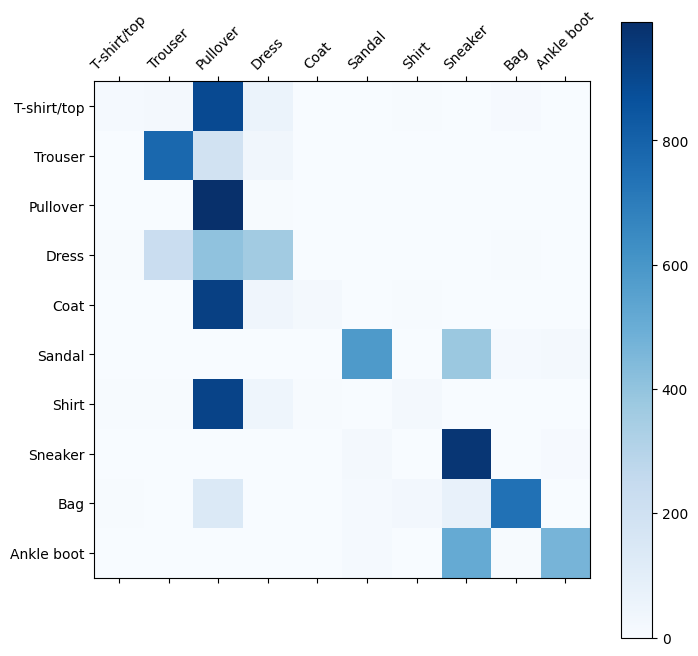

In [ ]:
# Plot the confusion matrix
plot_matrix(ada_confusion_matrix, target_names=labels, cm=plt.cm.Blues)


```
























```


<br>Retrieve the feature_importances from your model, turn them into a 28 by 28 numpy array and plot this matrix as well.

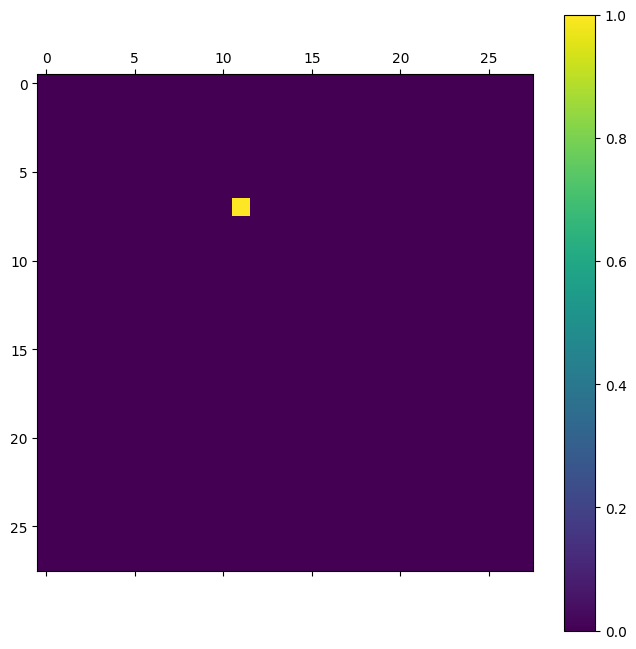

In [ ]:

# Retrieve the base estimator from the AdaBoostClassifier
base_estimator = ada_classifier.estimator_

# Fit the base estimator on the training data
base_estimator.fit(X_train, y_train)

# Retrieve feature importances from the base estimator
base_estimator_feature_importances = base_estimator.feature_importances_

# Turn them into a 28 by 28 numpy array
base_estimator_feature_importance_matrix = np.reshape(base_estimator_feature_importances, (28, 28))





# Plot base estimator feature importance matrix
plot_matrix(base_estimator_feature_importance_matrix, cm=plt.cm.viridis)




<br>**Tasks** <br>
> **Discussion questions [1 mark]** <br>

**Question:**<br>
> Which of the classifiers is most accurate on the test data?

<br>**Answer:**
<br>

>The ExtraTreesClassifier with 90 estimators achieved the highest out-of-bag (OOB) score on the test data among the three classifiers, indicating that it was the most accurate on this data.

>OOB scores for each classifier:
>>RandomForestClassifier:
>>>Best OOB Score = 0.8607

>>ExtraTreesClassifier (30 estimators):
>>>Best OOB Score = 0.86605

>>ExtraTreesClassifier (90 estimators):
>>>Best OOB Score = 0.8805833333333334


<br>

**Question:**<br>
> Look at your confusion matrix, what classes tends to be confused with each other, are they the same for the three classifiers? <br>Are there any insights you can give regarding the classes that tend to be confused with each other?

<br>**Answer:**
<br>

>The classes that tend to be confused with each other are as follows.

>RandomForestClassifier:

>>Class 0 ("T-shirt/top")
>>>Tends to be confused with classes 6 ("Shirt") and 2 ("Pullover").<br>

>>Class 2 ("Pullover")
>>>Tends to be confused with classes 4 ("Coat") and 6 ("Shirt").<br>

>>Class 3 ("Dress")
>>>Tends to be confused with class 2 ("Pullover").<br>

>>Class 6 ("Shirt")
>>>Tends to be confused with classes 2 ("Pullover") and 4 ("Coat").<br>

>>Class 7 ("Sneaker")
>>>Tends to be confused with class 9 ("Ankle boot").

>ExtraTreesClassifier (30 Estimators):

>>Similar to RandomForestClassifier.<br>

>>Class 0 ("T-shirt/top")
>>>Tends to be confused with classes 6 ("Shirt") and 2 ("Pullover").

>>Class 2 ("Pullover")
>>>Tends to be confused with classes 4 ("Coat") and 6 ("Shirt").

>>Class 3 ("Dress")
>>>Tends to be confused with class 2 ("Pullover").

>>Class 6 ("Shirt")
>>>Tends to be confused with classes 2 ("Pullover") and 4 ("Coat").

>>Class 7 ("Sneaker")
>>>Tends to be confused with class 9 ("Ankle boot").

>ExtraTreesClassifier (90 Estimators):

>>The confusion patterns are similar to the other classifiers.

>>Class 0 ("T-shirt/top")
>>>Exihibits a tendency to be confused with classes 6 ("Shirt") and 2 ("Pullover").

>>Class 2 ("Pullover")
>>>Tends to be confused with classes 4 ("Coat") and 6 ("Shirt").

>>Class 3 ("Dress")
>>>Tends to be confused with class 2 ("Pullover").

>>Class 6 ("Shirt")
>>>Tends to be confused with classes 2 ("Pullover") and 4 ("Coat").

>>Class 7 ("Sneaker")
>>>Tends to be confused with class 9 ("Ankle boot").

>Insights:

>>The classes "T-shirt/top," "Pullover," "Shirt," and "Coat" tend to be frequently confused with each other across all three classifiers.
These classes have visual similarities in the dataset which make it easier to confuse them for one another as the classifiers struggle with distinguishing between clothing items that have similar shapes and textures.

<br>

**Question:**<br>
> Look at the feature importance matrix in part 1, what do you notice about the feature importance matrix? Is there anything that
  relates that to the classes that are easily confused?

<br>**Answer:**
<br>

>The feature importance matrix reveals that certain pixels in the images are highly influential in differentiating between classes, while others have minimal impact.

>The predominantly purple areas indicate that these pixels have low feature importance. In other words, they don't contribute significantly to the decision-making process of the classifier. These pixels are unlikely to contain critical information for distinguishing between classes.

>The smatterings of blue squares suggest that there are specific pixels or regions in the images that are more important for classification. Blue squares indicate higher feature importance, meaning that these pixels play a more significant role in the classifier's decisions.

>The presence of yellow squares in the feature importance matrix indicates that certain pixels have exceptionally high feature importance. These pixels are critical for the classifier's ability to distinguish between classes. The specific coordinates of these yellow squares point to the locations of these important pixels within the images.

>It is especially noteworthy when yellow squares occure next to one another, as this may relate to how classes could be easily confused.<br>
When this occures it provides indication that there are regions in the images where there exist multiple adjacent pixels that are crucial for classification. These regions might correspond to distinctive features or patterns that are common among the easily confused classes.

<br>

**Question:**<br>
>What do you notice about the the test loss for the AdaBoostClassifier? what about the confusion matrix and the feature importance matrix?

<br>**Answer:**
<br>

>Test Loss for AdaBoostClassifier:
>>The test loss for the AdaBoostClassifier appears to decrease as the number of estimators increases up to around 90 estimators, reaching a minimum test error rate of about 0.42. However, after that point, both the training and test errors start to increase slightly, reaching around 0.5 by 300 estimators. This suggests that increasing the number of estimators beyond a certain point may lead to overfitting.

>Confusion Matrix for AdaBoostClassifier:
>>The confusion matrix provides insights into the model's performance on different classes. It shows how many samples were correctly classified (diagonal elements) and where the model tends to make errors. Based on the confusion matrix, it appears that the model struggles to correctly classify some classes, as indicated by off-diagonal elements with non-negligible values.

<br><br><br>

>Feature Importance Matrix:
>>The feature importance matrix consists mainly of purple squares (indicating values close to 0) with a single yellow square (indicating a value close to 1). The yellow square's position (horizontal and vertical values of about 11 and 7, respectively) indicates that one feature is significantly more important than others. This feature has a strong influence on the AdaBoostClassifier's decisions. Analyzing this feature more closely may provide insights into what it represents and its relevance to the classification task.

<br>

**Question:**<br>
> Hypothetically, should you use the test loss to choose the optimum number of estimators for the AdaBoostClassifier?

<br>**Answer:**
<br>

>No, you should not use the test loss to choose the optimum number of estimators for the AdaBoostClassifier.<br> Test loss is a measure of the model's performance on a held-out test dataset and is primarily used to evaluate the model's generalization performance, not to select hyperparameters.
